# Task 1 - SMS Spam Detection

# Install required packages

In [1]:
!pip install -q pandas scikit-learn nltk matplotlib seaborn gradio


In [2]:
# Basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# ML libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

nltk.download('stopwords')

In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("spam.csv", encoding='latin-1')[["v1", "v2"]]
df.columns = ["label", "text"]
df.head()

Saving spam.csv to spam.csv


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('label')):
  _plot_series(series, series_name, i)
  fig.legend(title='label', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_6.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('text')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

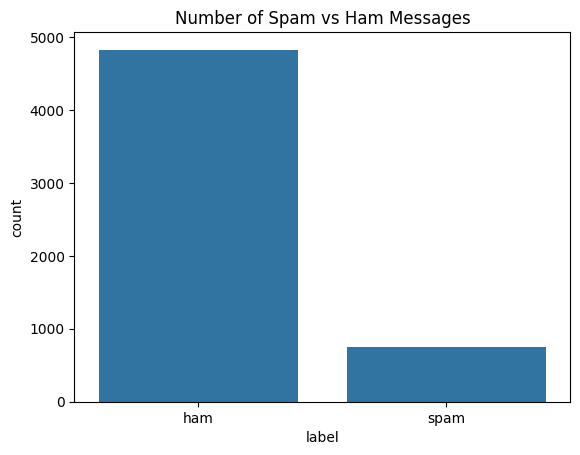

,proportion
label,
ham,0.865937
spam,0.134063


In [4]:
# Visualize distribution
sns.countplot(x='label', data=df)
plt.title("Number of Spam vs Ham Messages")
plt.show()

df['label'].value_counts(normalize=True)


In [5]:
# Function to clean and preprocess text
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)
df.head()


,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [6]:
# Convert text to numerical vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label'].map({'ham': 0, 'spam': 1})


In [7]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
print("Naive Bayes:\n", classification_report(y_test, model_nb.predict(X_test)))

# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
print("Logistic Regression:\n", classification_report(y_test, model_lr.predict(X_test)))

# SVM
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)
print("SVM:\n", classification_report(y_test, model_svm.predict(X_test)))


Naive Bayes:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Logistic Regression:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.96      0.60      0.74       150

    accuracy                           0.94      1115
   macro avg       0.95      0.80      0.85      1115
weighted avg       0.94      0.94      0.94      1115

SVM:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.84      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.98      0.9

In [9]:
# Save Naive Bayes model and vectorizer
import joblib

joblib.dump(model_nb, "spam_model_nb.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

In [10]:
# Build and launch a simple Gradio interface
import gradio as gr

def predict_spam(message):
    cleaned = clean_text(message)
    vect = vectorizer.transform([cleaned])
    prediction = model_nb.predict(vect)[0]
    return "Spam" if prediction == 1 else " Not Spam"

gr.Interface(fn=predict_spam, inputs="text", outputs="text", title="📩 SMS Spam Classifier").launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a8438e7d8ca5b381e0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
